In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim

In [3]:
df = pd.read_csv('./data/AccidentesAviones.csv')

In [4]:
df.head(2)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


In [5]:
# Eliminamos la columna Unnamed: 0
df.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

In [6]:
df.head(2)

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


In [7]:
# Cambiamos los nombres de las columnas
df.rename(columns={'fecha': 'Date',
                   'HORA declarada': 'Time',
                   'Ruta': 'Location',
                   'OperadOR':'Operator',
                   'flight_no':'Flight',
                   'route': 'Route',
                   'ac_type':'Type',
                   'registration':'Registration',
                   'cn_ln':'cn/In',
                   'all_aboard': 'All_Aboard',
                   'PASAJEROS A BORDO':'Passengers_Aboard',
                   'crew_aboard': 'Crew_Aboard',
                   'cantidad de fallecidos':'All_Fatalities',
                   'passenger_fatalities':'Passangers_Fatalities',
                   'crew_fatalities':'Crew_Fatalities',
                   'ground':'Ground',
                   'summary':'Summary'},inplace=True)

In [8]:
df.head(2)

,Date,Time,Location,Operator,Flight,Route,Type,Registration,cn/In,All_Aboard,Passengers_Aboard,Crew_Aboard,All_Fatalities,Passangers_Fatalities,Crew_Fatalities,Ground,Summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


In [9]:
fils , columns = df.shape
print(f'El Dataframe tiene {fils} filas y {columns} columnas')

El Dataframe tiene 5008 filas y 17 columnas


In [10]:
# Normalizar la columna date

df['Date'] = pd.to_datetime(df['Date'])

## Columna Time hay
- c 00:00
- 00:00Z
- 0000
- c:00:00
- 00;00

In [11]:
def normalize_time(value):
    value = value.replace('?', '00:00').replace('c:', '').replace('c', '').replace('Z', '').replace(' ', '').replace(':', '').replace(';', '')

    if ':' not in value:
        return value
    elif value[0] == ':':
        return f'00{value}'
    elif value[-1] == ':':
        return f'{value}00'
    elif len(value) == 4:
        return '0' + value
    else:
        return value


In [12]:
df['Time']=df['Time'].apply(lambda x: normalize_time(x))

In [13]:
df['Time']=pd.to_datetime(df['Time'],format='%H%M').dt.time

In [14]:
df = df.replace("?",np.nan)

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year


In [16]:
# Reemplazmos los nulos de las siguientes columnas con 0
cols = ['All_Aboard', 'Passengers_Aboard', 'Crew_Aboard', 'All_Fatalities', 'Passangers_Fatalities', 'Crew_Fatalities', 'Ground']
df[cols] = df[cols].fillna(0)

In [17]:
col_numericas = ['All_Aboard', 'Passengers_Aboard', 'Crew_Aboard', 'All_Fatalities', 'Passangers_Fatalities', 'Crew_Fatalities', 'Ground']
df[col_numericas] = df[col_numericas].astype(int)

In [18]:
cols2 = ['Date'	,'Time','Location',	'Operator','Flight'	,'Route','Type'	,'Registration','cn/In','Summary','Year']
df[cols2] = df[cols2].fillna('Sin Dato')

In [19]:
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent="franjuan")

In [20]:
df2=df.truncate(before='4900')

In [21]:
import time
start=time.time()

from geopy.extra.rate_limiter import RateLimiter
geocode= RateLimiter(geolocator.geocode, min_delay_seconds=1)

df2['Location']=df2['Location'].apply(geocode)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Taipei, Taiwan',), **{}).
Traceback (most recent call last):
  File "/home/franjuan/Documentos/PI02_DTS10/venv/lib/python3.9/site-packages/geopy/adapters.py", line 297, in get_text
    page = self.urlopen(req, timeout=timeout)
  File "/home/franjuan/.pyenv/versions/3.9.2/lib/python3.9/urllib/request.py", line 517, in open
    response = self._open(req, data)
  File "/home/franjuan/.pyenv/versions/3.9.2/lib/python3.9/urllib/request.py", line 534, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +
  File "/home/franjuan/.pyenv/versions/3.9.2/lib/python3.9/urllib/request.py", line 494, in _call_chain
    result = func(*args)
  File "/home/franjuan/.pyenv/versions/3.9.2/lib/python3.9/urllib/request.py", line 1389, in https_open
    return self.do_open(http.client.HTTPSConnection, req,
  File "/home/franjuan/.pyenv/versions/3.9.2/lib/python3.9/urllib/request.py", line 1350, in do_open
    r = h.get

In [22]:
df = pd.DataFrame(df)
df.to_csv("accidentesAvionesClean.csv")

In [23]:
df2 = pd.DataFrame(df2)
df2.to_csv("accidentesAvionesMuestra.csv")

### EDA

<Axes: >

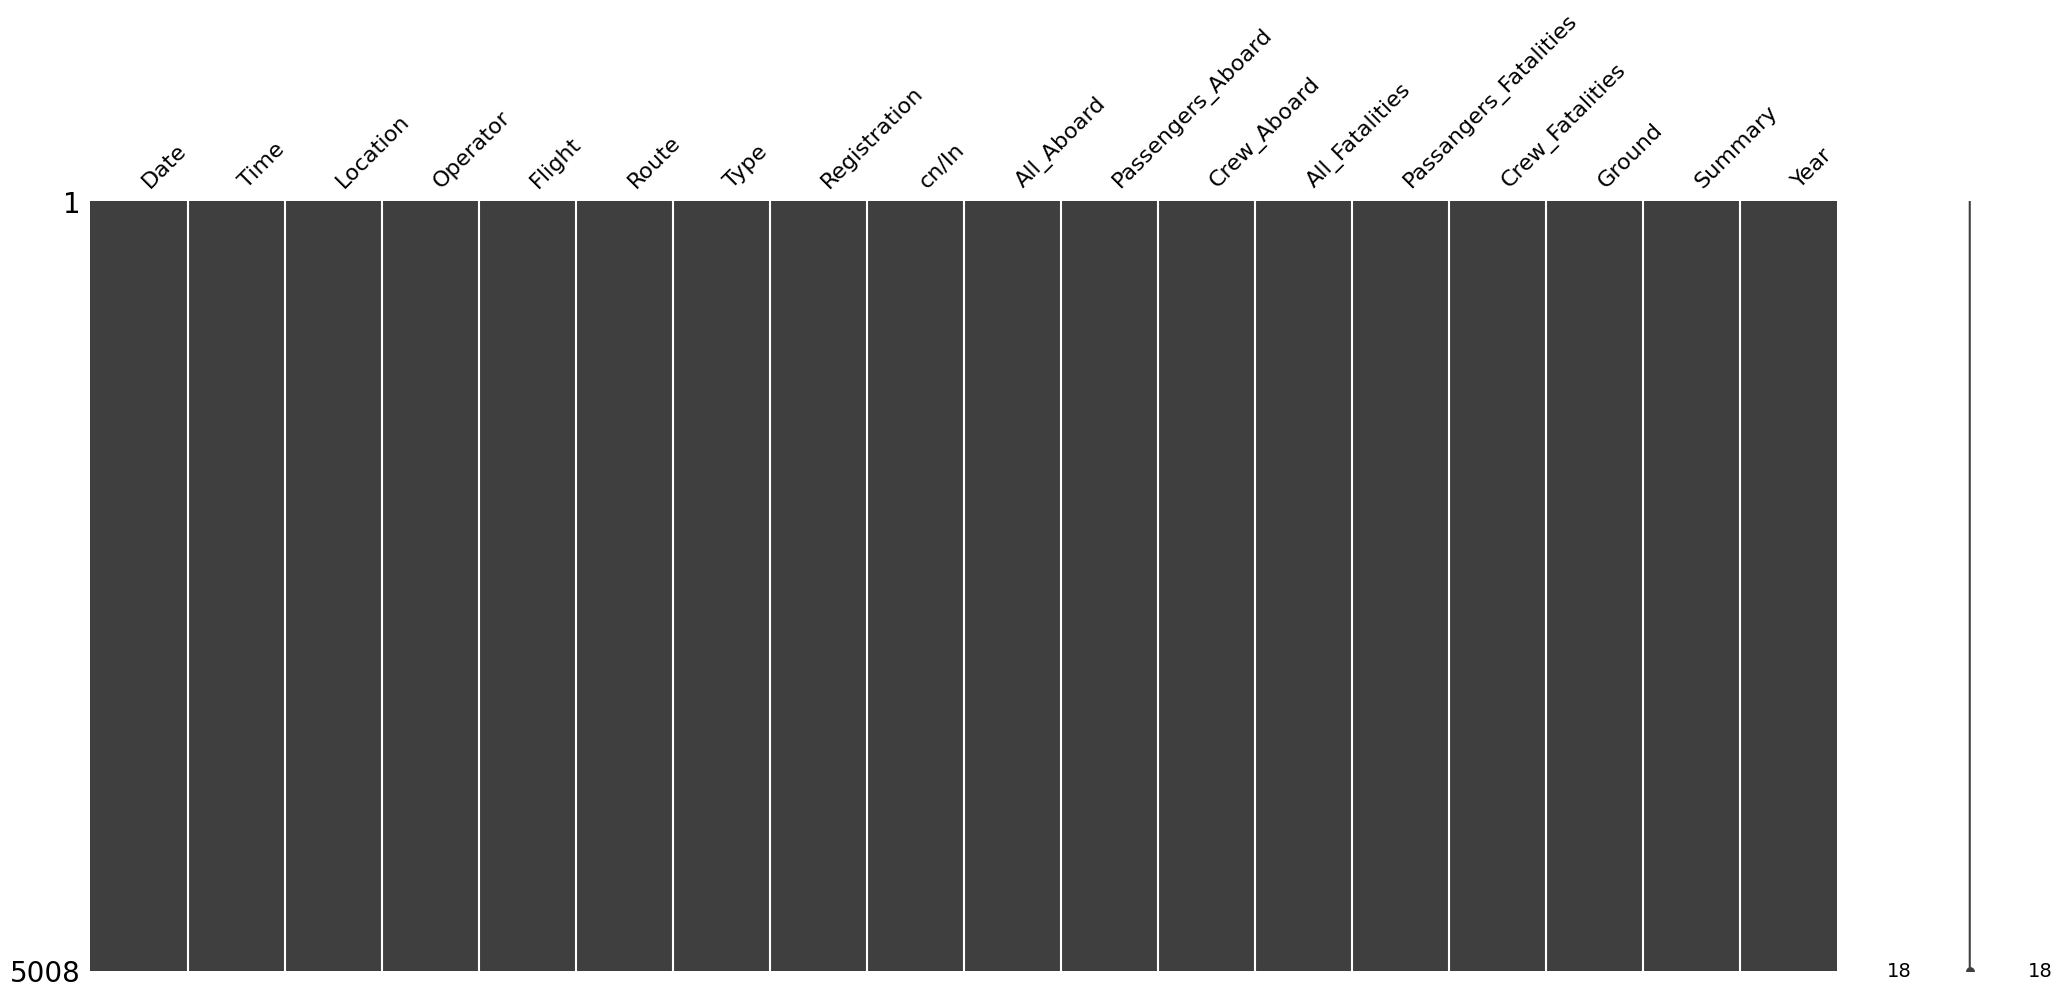

In [24]:
#Utilizando la librería missingno podemos ver si hay huecos en la información a través de una visualización
msno.matrix(df)

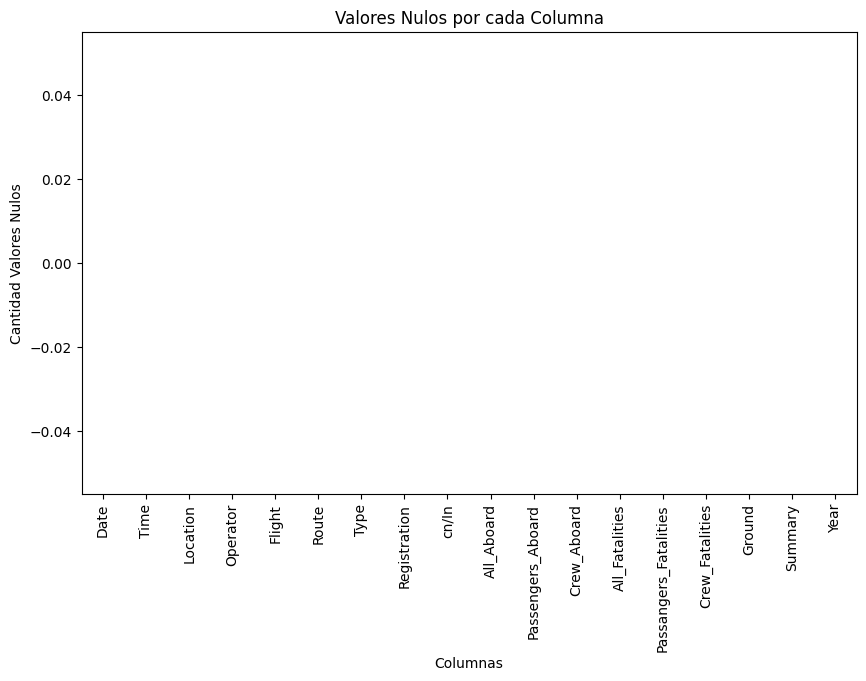

In [25]:
# En un grafico vemos que columnas que hemos establecido se ven la cantidad de valores nulos
null_counts = df.isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Columnas')
plt.ylabel('Cantidad Valores Nulos')
plt.title('Valores Nulos por cada Columna')
plt.show()

#### All_Fatalities Analisis

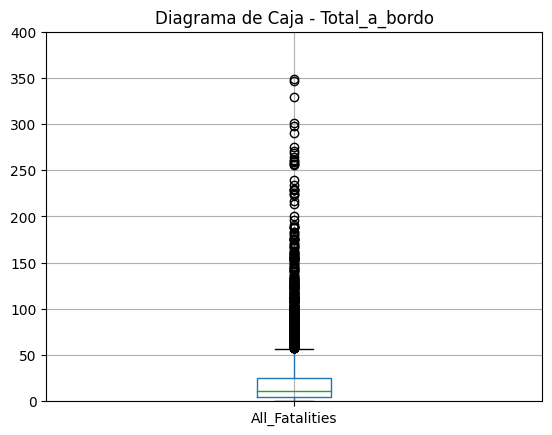

In [26]:
plt.figure()
df.boxplot(column="All_Fatalities")
plt.title('Diagrama de Caja - Total_a_bordo')
plt.ylim(0,400)
plt.show()

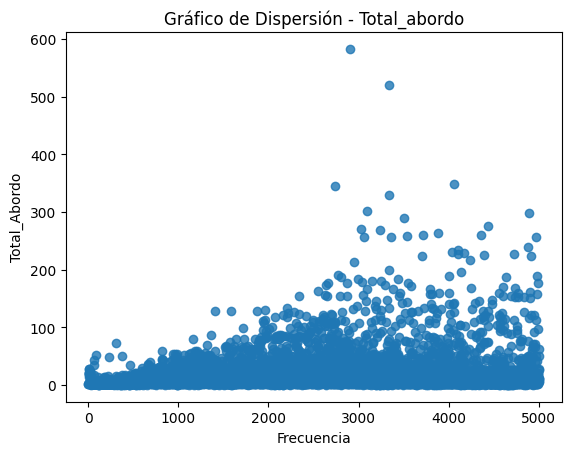

In [27]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure()
sns.regplot(x=df.index, y=df["All_Fatalities"])
plt.title('Gráfico de Dispersión - Total_abordo')
plt.xlabel('Frecuencia')
plt.ylabel('Total_Abordo')
plt.show()

#### All_Aboard Analisis


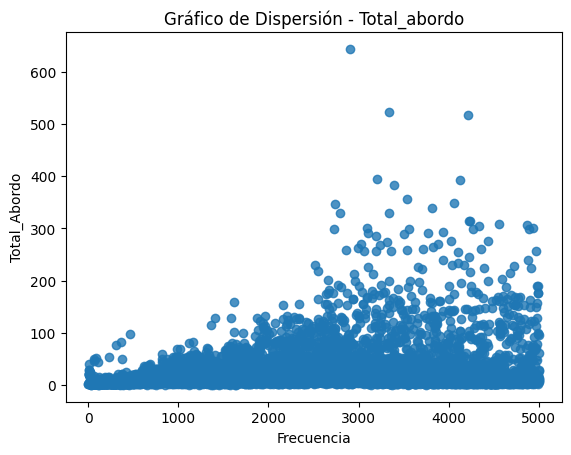

In [28]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure()
sns.regplot(x=df.index, y=df["All_Aboard"])
plt.title('Gráfico de Dispersión - Total_abordo')
plt.xlabel('Frecuencia')
plt.ylabel('Total_Abordo')
plt.show()

In [29]:
# Vemos si hay una correlacion
df_corr = df[['All_Aboard', 'Passengers_Aboard', 
              'Crew_Aboard', 'All_Fatalities', 
              'Passangers_Fatalities', 'Crew_Fatalities', 
              'Ground']].dropna().corr()

<Axes: >

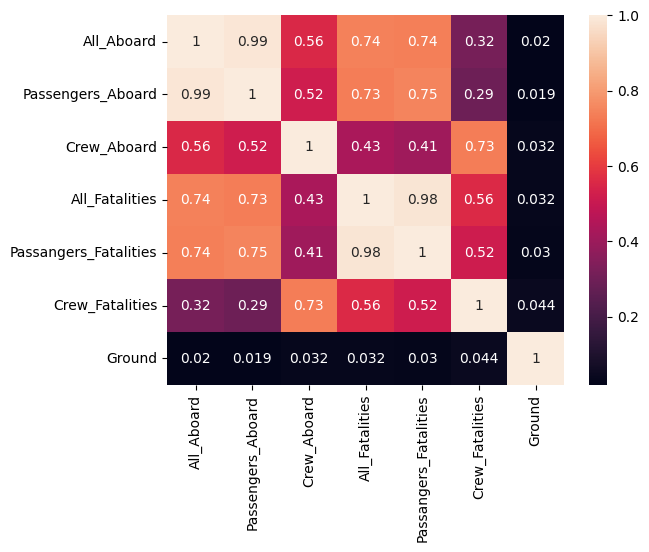

In [30]:
sns.heatmap(df_corr, annot=True)

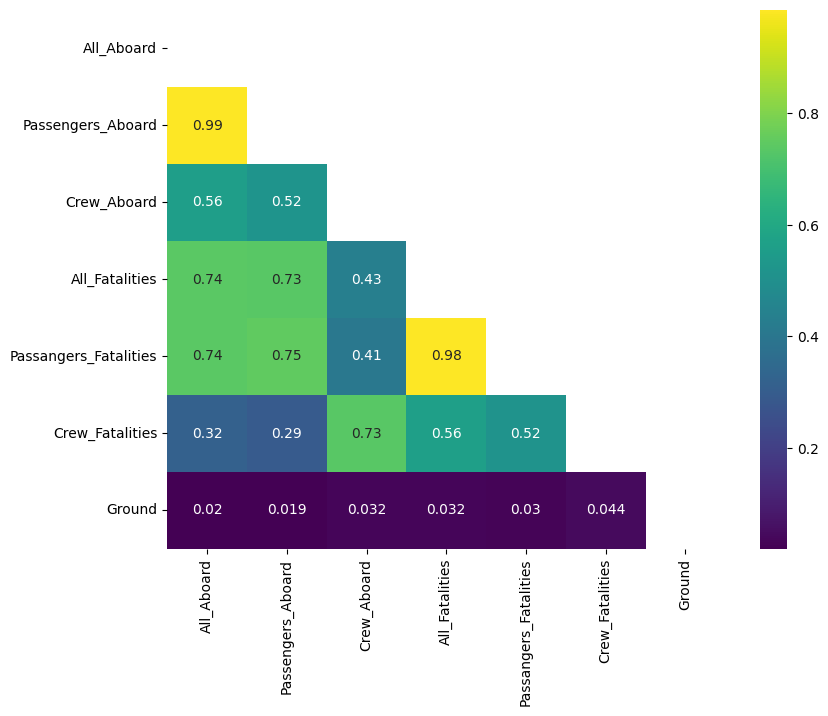

In [31]:

#Definimos el tamaño de la figura para asegurar que se observen los valores interiores
ax = plt.subplots(figsize=(9,7))

#Generamos una máscara para evitar tener un espejo en la parte superior de la gráfica y simplificar la observación
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

#Usando seaborn heatmap como tipo de gráfica, colocamos los valores, solicitamos que incluya las anotaciones y seleccionamos un mapa de color, en este caso utilizamos "viridis" y seleccionamos la máscara para no mostrar los datos duplicados, iniciando por la diagonal de unos en la parte central de la gráfica
ax = sns.heatmap(df_corr,annot=True,cmap='viridis',mask = mask)


### KPI

- Reducir en un 5% la tasa de mortalidad anual.

In [176]:
df['All_Aboard']=df['All_Aboard'].astype('int')

In [177]:
fatAboardYear=df.groupby('Year')['All_Fatalities'].sum().reset_index()

In [178]:
aboarYear=df.groupby('Year')['All_Aboard'].sum().reset_index()

In [179]:
tasaMortalidad=fatAboardYear.merge(aboarYear, on='Year', how='outer')

In [180]:
tasaMortalidad['Tasa_Mortalidad_Anual']=tasaMortalidad['All_Fatalities'].divide(tasaMortalidad['All_Aboard'])

In [181]:
tasaMortalidad

,Year,All_Fatalities,All_Aboard,Tasa_Mortalidad_Anual
0,1908,1,2,0.500000
1,1909,1,1,1.000000
2,1912,5,5,1.000000
3,1913,43,49,0.877551
4,1915,36,60,0.600000
...,...,...,...,...
106,2017,214,245,0.873469
107,2018,874,1239,0.705408
108,2019,305,432,0.706019
109,2020,355,703,0.504979


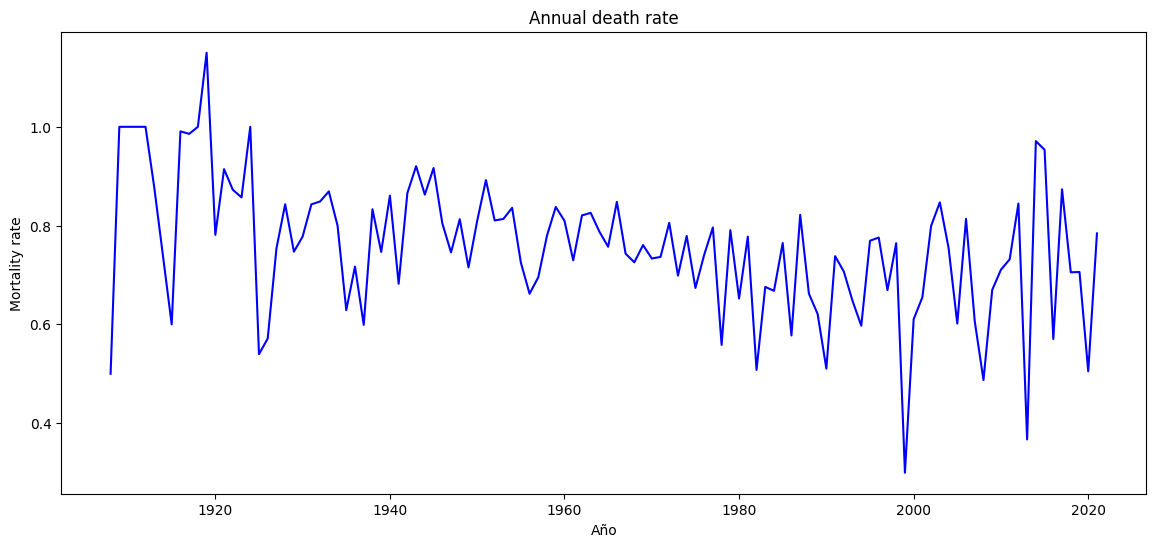

In [182]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=tasaMortalidad, x='Year', y='Tasa_Mortalidad_Anual', color='blue')
plt.xlabel('Año')
plt.ylabel('Mortality rate')
plt.title('Annual death rate')
plt.show()

#### Encontrar el indicie de Supervivencia

- Aumentar el índice de supervivencia en un 5% anualmente

In [183]:
totalSobrevivientes=fatAboardYear.merge(aboarYear, on='Year', how='outer')

In [184]:
df['totalSobrevivientes']= totalSobrevivientes['All_Fatalities'] - totalSobrevivientes['All_Aboard']


In [185]:
totalSobrevivientes

,Year,All_Fatalities,All_Aboard
0,1908,1,2
1,1909,1,1
2,1912,5,5
3,1913,43,49
4,1915,36,60
...,...,...,...
106,2017,214,245
107,2018,874,1239
108,2019,305,432
109,2020,355,703


In [186]:
df['Crew_Aboard']=df['Crew_Aboard'].astype('int')

In [187]:
passangerAboard=df.groupby('Year')['Passengers_Aboard'].sum().reset_index()

In [188]:
crewAboard=df.groupby('Year')['Crew_Aboard'].sum().reset_index()

In [189]:
totalPersonas= passangerAboard.merge(crewAboard, on='Year', how='outer')

In [190]:
df['totalPersonas'] = totalPersonas.apply(lambda row: sum([row['Passengers_Aboard'], row['Crew_Aboard']]), axis=1)

In [191]:
totalSobre=df.groupby('Year')['totalSobrevivientes'].sum().reset_index()

In [192]:
totalPerso=df.groupby('Year')['totalPersonas'].sum().reset_index()

In [193]:
indicieSuper=totalSobre.merge(totalPerso, on='Year', how='outer')

In [194]:
indicieSuper['indiceSupervivencia']=indicieSuper['totalSobrevivientes'].divide(indicieSuper['totalPersonas'])

In [195]:
indicieSuper

,Year,totalSobrevivientes,totalPersonas,indiceSupervivencia
0,1908,-1.0,2.0,-0.500000
1,1909,0.0,1.0,0.000000
2,1912,0.0,5.0,0.000000
3,1913,-31.0,61.0,-0.508197
4,1915,-2.0,1.0,-2.000000
...,...,...,...,...
106,2017,0.0,0.0,NaN
107,2018,0.0,0.0,NaN
108,2019,0.0,0.0,NaN
109,2020,0.0,0.0,NaN


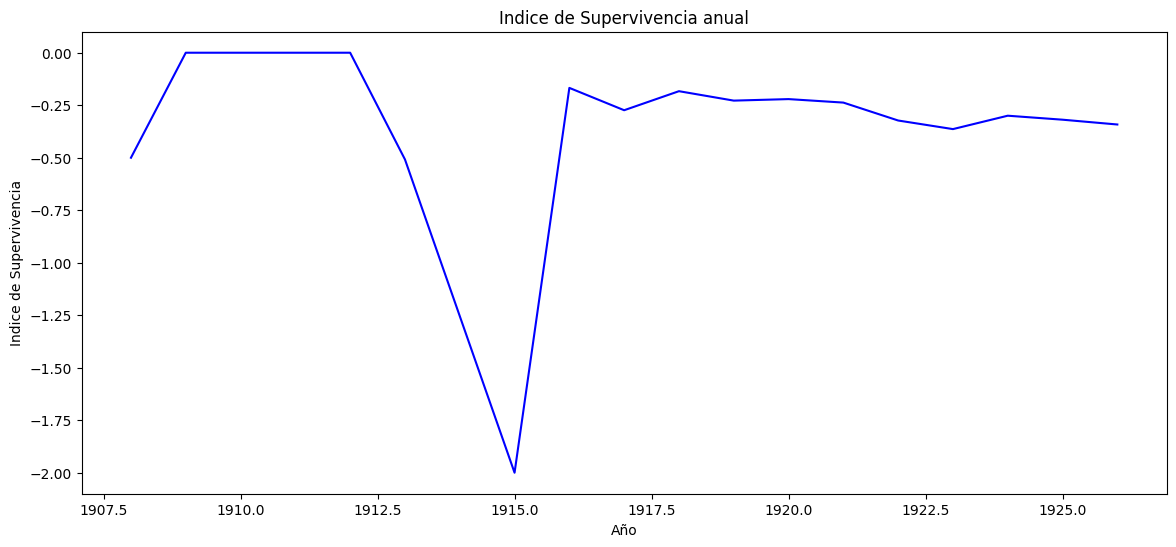

In [196]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=indicieSuper, x='Year', y='indiceSupervivencia', color='blue')
plt.xlabel('Año')
plt.ylabel('Indice de Supervivencia')
plt.title('Indice de Supervivencia anual')
plt.show()

### Tasa Siniestro

In [199]:
Temp1 = df.groupby(df.Date.dt.year)[['Date']].count()
Temp1 = Temp1.rename(columns={"Date": "Count"})
Temp2= Temp1/15000000*1000000

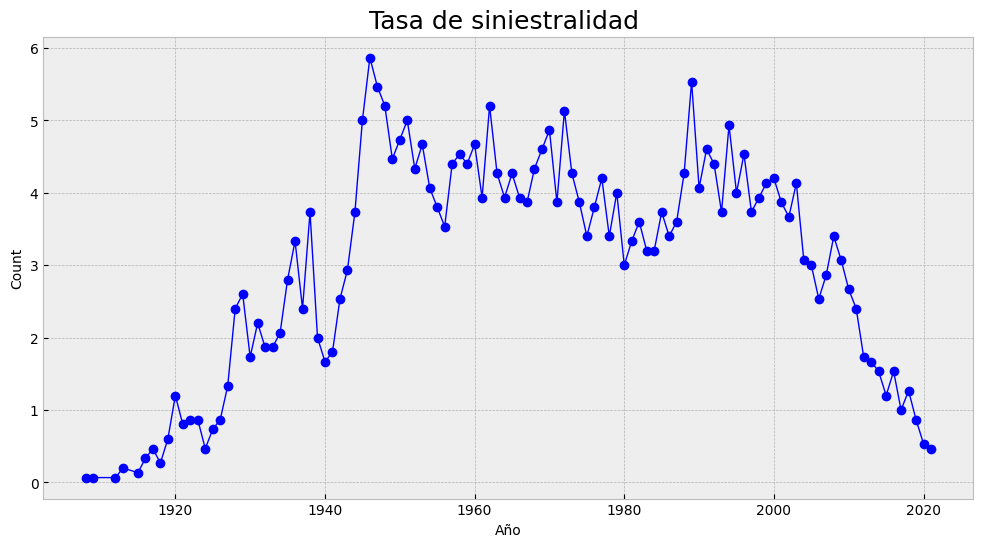

In [201]:
plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp2.index, Temp2['Count'], color='blue', marker = "o", linewidth=1)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Tasa de siniestralidad ', loc='Center', fontsize=18)
plt.show()

#### Tasa de accidentes por millón de vuelos

- Es la proporción de accidentes ocurridos por cada millón de vuelos realizados. Se calcula dividiendo el número total de accidentes por el número total de vuelos y multiplicando por un millón.

In [205]:
tasaVuelos=fatAboardYear.merge(aboarYear, on='Year', how='outer')

In [206]:
tasaVuelos['totalVuelos']= tasaVuelos['All_Fatalities'].divide(tasaVuelos['All_Aboard'])*1000000

In [207]:
tasaVuelos

,Year,All_Fatalities,All_Aboard,totalVuelos
0,1908,1,2,500000.000000
1,1909,1,1,1000000.000000
2,1912,5,5,1000000.000000
3,1913,43,49,877551.020408
4,1915,36,60,600000.000000
...,...,...,...,...
106,2017,214,245,873469.387755
107,2018,874,1239,705407.586764
108,2019,305,432,706018.518519
109,2020,355,703,504978.662873


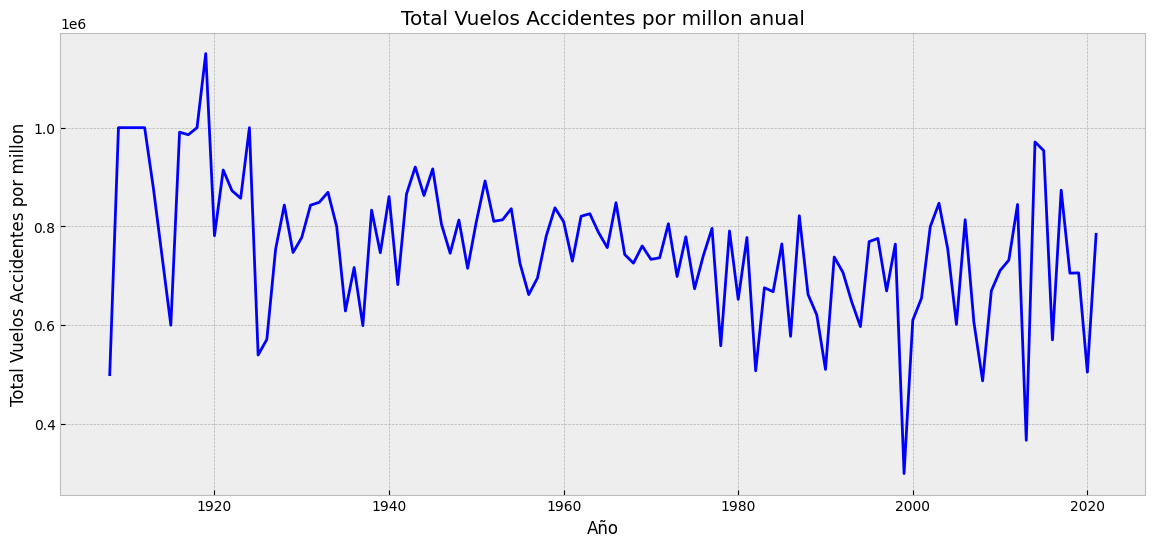

In [208]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=tasaVuelos, x='Year', y='totalVuelos', color='blue')
plt.xlabel('Año')
plt.ylabel('Total Vuelos Accidentes por millon')
plt.title('Total Vuelos Accidentes por millon anual')
plt.show()

### GRACIAS :)